# Visualisering av temperaturdata

In [1]:
import sys
sys.path.append("../src")

from weather import analyse_og_visualisere

analyser = analyse_og_visualisere()

resultater = analyser.analyser_vaerdata()




### Her har vi visualisering av temperatur

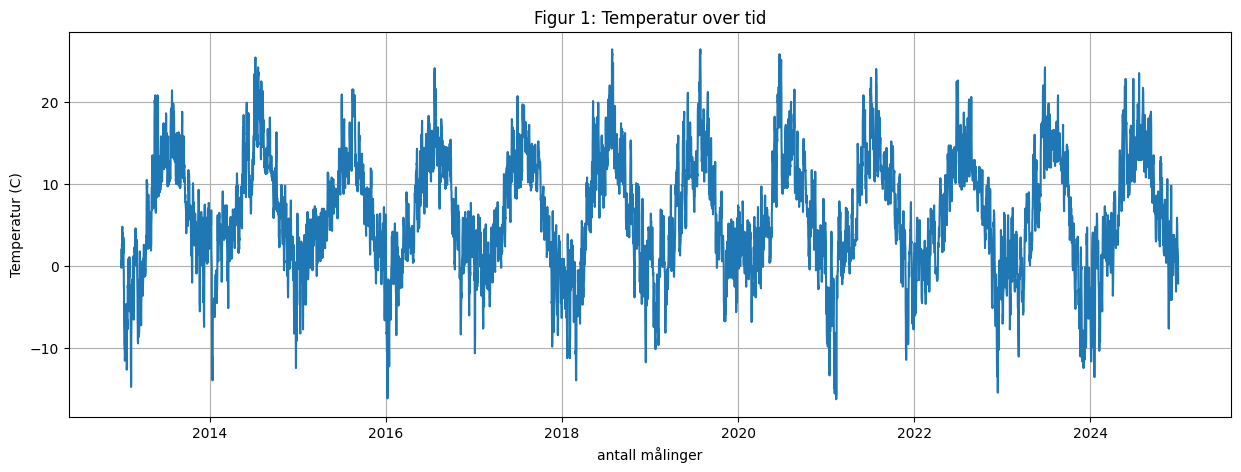

FigureWidget({
    'data': [{'marker': {'color': 'Orange'},
              'name': 'Gjennomsnittstemperatur',
              'text': [5.81°C, 7.38°C, 6.76°C, 5.86°C, 5.98°C, 6.19°C, 5.86°C,
                       7.09°C, 5.90°C, 6.22°C, 5.34°C, 7.06°C],
              'textposition': 'outside',
              'type': 'bar',
              'uid': 'dc924ea9-cb3b-463f-846d-6c8d4a0e22aa',
              'x': array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
                         dtype=int32),
              'y': array([5.81, 7.38, 6.76, 5.86, 5.98, 6.19, 5.86, 7.09, 5.9 , 6.22, 5.34, 7.06])}],
    'layout': {'barmode': 'group',
               'height': 600,
               'hovermode': 'x unified',
               'showlegend': True,
               'template': '...',
               'title': {'text': 'Årlig gjennomsnittlig temperatur'},
               'xaxis': {'tickangle': 45, 'title': {'text': 'År'}},
               'yaxis': {'title': {'text': 'Temperatur (°C)'}}}


Gjennomsnittstemperaturen er: 6.25 °C
Median temperaturen er: 5.9 °C
Standardavviket til temperaturen er: 7 °C


In [2]:

analyser.temperatur(resultater)

Av figur 1 ser vi et tydelig mønster, og vi ser tydelig hva som er sommer og hva som er vinter. Av figur 2 ser vi litt variasjon fra år til år, noe som vil være naturlig. Ellers ser vi også at det er lite økning totalt sett gjennom de 12 årene,men hvis vi hadde sett på et større tidsperspektiv hadde vi nok sett en økning i gjennomsnittstemperaturen. Et standardavvik på 7°C og gjennomsnittstemperaturen er på 6.25°C betyr at de fleste temperaturverdiene ligger mellom -0.75°C og 13.25°C. Med et såpass høyt standardavvik tyder det på store sesongvariasjoner i temperaturen, noe vi kan bekrefte med figur 1.

### Her har vi en visualisering av nedbøren

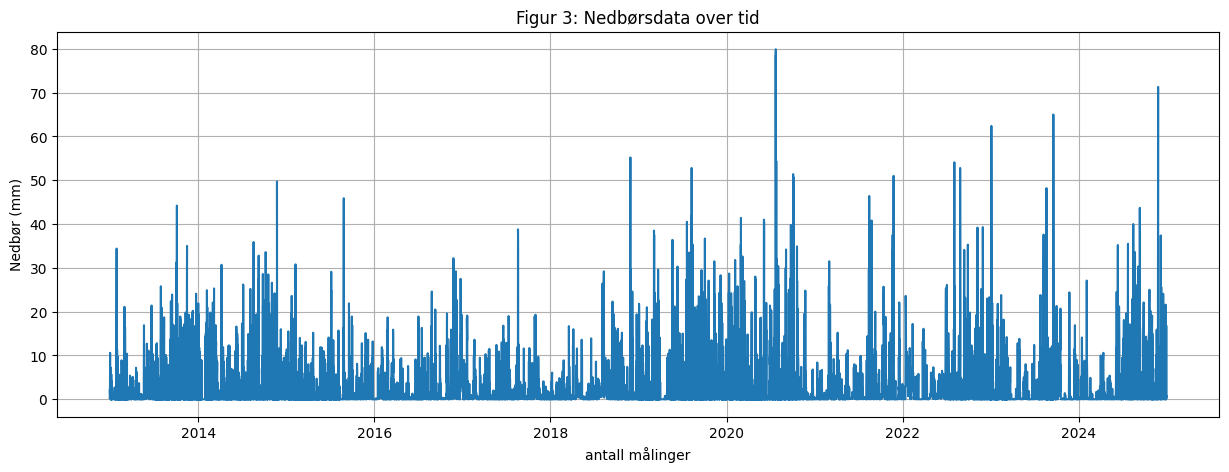

FigureWidget({
    'data': [{'marker': {'color': 'Blue'},
              'name': 'Gjennomsnittsnedbør',
              'text': [2.36mm, 2.60mm, 1.70mm, 2.59mm, 2.16mm, 2.07mm, 3.21mm,
                       3.08mm, 2.79mm, 3.25mm, 2.92mm, 3.33mm],
              'textposition': 'outside',
              'type': 'bar',
              'uid': 'b6345c2b-0cca-44d6-8aec-076969588e51',
              'x': array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
                         dtype=int32),
              'y': array([2.36, 2.6 , 1.7 , 2.59, 2.16, 2.07, 3.21, 3.08, 2.79, 3.25, 2.92, 3.33])}],
    'layout': {'barmode': 'group',
               'height': 600,
               'hovermode': 'x unified',
               'showlegend': True,
               'template': '...',
               'title': {'text': 'Årlig gjennomsnittlig nedbør'},
               'xaxis': {'tickangle': 45, 'title': {'text': 'År'}},
               'yaxis': {'title': {'text': 'Nedbør (mm)'}}}
})

Gjennomsnittsnedbøren er: 2.65 mm
Median nedbøren er: 0.2 mm
Standardavviket til nedbøren er: 6 mm


In [3]:
analyser.nedbør(resultater)

Vi ser av figur 4 at nedbøren har økt litt de siste årene

### Sammenheng mellom nedbør og temperatur

Korrelasjon mellom temperatur og nedbør: 0.04


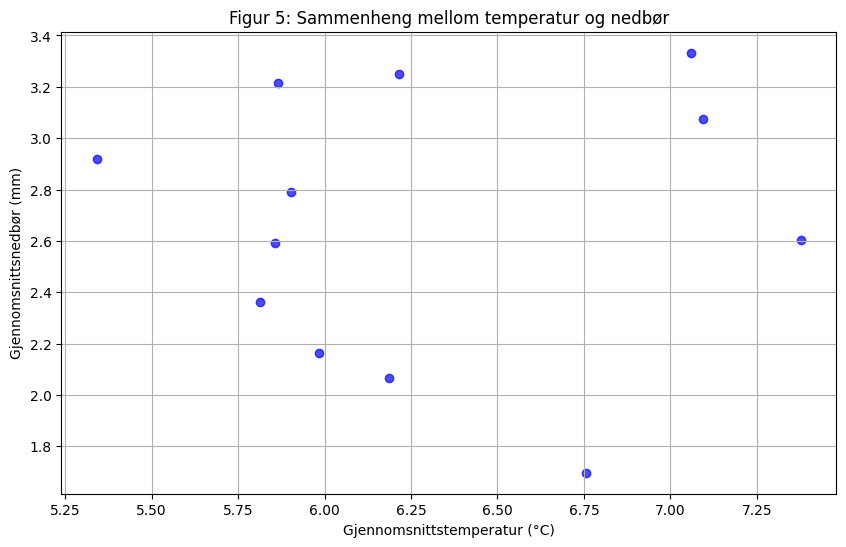

In [4]:
analyser.sammenlign_temp_nedbør(resultater)

Her ser vi at ved lave temperaturer kan vi også få mye nedbør. og ved høye temperaturer kan vi ha lav nedbør. En korrelasjonsverdi på 0.04 betyr at det er veldig liten korrelasjon mellom nedbøren og temperaturen i disse årene. 

### Prediktiv analyse

In [5]:
analyser.prediksjonsanalyse_nedbør_lineær(resultater)

Av figur 6 ser vi at nedbøren kommer til å øke gradvis de neste ti årene. I 2034 vil nedbøren ligge på nesten 1mm mer per dag enn det den er i dag. Vi har tatt i bruk et scatterplot for å gjøre det tydelig hvor mye nedbør det kan komme i fremtiden.

In [6]:
analyser.prediksjonsanalyse_temperatur_lineær(resultater)

Fra figur 6 ser vi at ved lineær regresjon vil vi ha en liten nedgang i gjennomsnittstemperaturen de neste ti årene. Denne modellen gjør det lett og oversiktlig å se trender. Det er i tillegg veldig lett å se forskjell på hva som er faktiske data og hva som er prediktert.